# TP 03 :  Optimisation des Feux de Circulation avec Apprentissage par Renforcement

### Exercice 1:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from env_traffic import TrafficEnvironment 

env = TrafficEnvironment()
state = env.reset()

for _ in range(10):
    action = 0
    next_state, reward = env.step(action)
    print(f"Etat : {next_state}, Recompense : {reward}")

🚦 Initial Traffic Light Simulation 🚦
State Format: [Cars North, Cars South, Cars East, Cars West]
Actions: 0 = Keep Current Light, 1 = Switch Light
Initial state: [6 4 5 4] (NS Green, EW Red)
Step 1:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [3 3 5 5]
  🎯 Reward (Cars Passed): 3
----------------------------------------
Step 2:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [3 3 0 2]
  🎯 Reward (Cars Passed): 5
----------------------------------------
Step 3:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [2 0 2 3]
  🎯 Reward (Cars Passed): 3
----------------------------------------
Step 4:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [2 1 1 2]
  🎯 Reward (Cars Passed): 2
----------------------------------------
Step 5:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [2 0 1 4]
  🎯 Reward (Cars Passed): 3
----------------

### Exercice 2: Implementation de Q-Learning

In [3]:
def discretize_state(state, bins=(10, 10, 10, 10)):
    s0 = min(int(state[0]), bins[0]-1)
    s1 = min(int(state[1]), bins[1]-1)
    s2 = min(int(state[2]), bins[2]-1)
    s3 = min(int(state[3]), bins[3]-1)
    return (s0, s1, s2, s3)

In [4]:
def train_q_learning(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995):
    # Initialisation de la Q-Table
    q_table = np.zeros((10, 10, 10, 10, 2))
    rewards = []
    
    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False
        max_steps = 100  
        step = 0
        
        while not done and step < max_steps:
            # Discrétisation de l'état pour indexation
            disc_state = discretize_state(state)
            
            # Stratégie epsilon-greedy
            if np.random.random() < epsilon:
                action = np.random.choice([0, 1])  # Exploration: action aléatoire
            else:
                action = np.argmax(q_table[disc_state])  # Exploitation
            
            # Exécuter l'action
            next_state, reward = env.step(action)
            total_reward += reward
            
            # Discrétisation du prochain état
            disc_next_state = discretize_state(next_state)
            
            # Mise à jour Q-Learning
            old_value = q_table[disc_state][action]
            next_max = np.max(q_table[disc_next_state])
            
            # Q(s,a) ← Q(s,a) + α[R + γ max_a' Q(s',a') - Q(s,a)]
            new_value = old_value + alpha * (reward + gamma * next_max - old_value)
            q_table[disc_state][action] = new_value
            
            # Passage à l'état suivant
            state = next_state
            
            # Incrémenter le compteur de pas
            step += 1
            
            # Vérification de fin d'épisode (exemple de condition)
            if step >= max_steps:
                done = True
        
        # Décroissance d'epsilon
        epsilon *= decay
        rewards.append(total_reward)
        
        if episode % 100 == 0:
            print(f"Épisode {episode}: Récompense totale = {total_reward}")
    
    return q_table, rewards


In [5]:
# Appel de la fonction train_q_learning avec les paramètres par défaut
q_table, rewards = train_q_learning(env)



Épisode 0: Récompense totale = 303
Épisode 100: Récompense totale = 309
Épisode 200: Récompense totale = 311
Épisode 300: Récompense totale = 323
Épisode 400: Récompense totale = 320
Épisode 500: Récompense totale = 315
Épisode 600: Récompense totale = 313
Épisode 700: Récompense totale = 332
Épisode 800: Récompense totale = 324
Épisode 900: Récompense totale = 324


### Exercice 3 : Implémentation de SARSA

In [6]:
def train_sarsa(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995):
    q_table = np.zeros((10, 10, 10, 10, 2))
    rewards = []
    
    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False
        max_steps = 100  # Limite de pas par épisode
        step = 0
        
        # Discrétisation de l'état pour indexation
        disc_state = discretize_state(state)
        
        # Sélection de la première action (epsilon-greedy)
        if np.random.random() < epsilon:
            action = np.random.choice([0, 1])
        else:
            action = np.argmax(q_table[disc_state])
        
        while not done and step < max_steps:
            # Exécuter l'action
            next_state, reward = env.step(action)
            total_reward += reward
            
            # Discrétisation du prochain état
            disc_next_state = discretize_state(next_state)
            
            # Sélection de la prochaine action (epsilon-greedy)
            if np.random.random() < epsilon:
                next_action = np.random.choice([0, 1])
            else:
                next_action = np.argmax(q_table[disc_next_state])
            
            # Mise à jour SARSA
            old_value = q_table[disc_state][action]
            next_value = q_table[disc_next_state][next_action]
            
            # Q(s,a) ← Q(s,a) + α[R + γQ(s',a') - Q(s,a)]
            new_value = old_value + alpha * (reward + gamma * next_value - old_value)
            q_table[disc_state][action] = new_value
            
            # Passage à l'état et action suivants
            state = next_state
            disc_state = disc_next_state
            action = next_action
            
            # Incrémenter le compteur de pas
            step += 1
            
            # Vérification de fin d'épisode
            if step >= max_steps:
                done = True
        
        # Décroissance d'epsilon
        epsilon *= decay
        rewards.append(total_reward)
        
        if episode % 100 == 0:
            print(f"Épisode {episode}: Récompense totale = {total_reward}")
    
    return q_table, rewards

In [7]:
sarsa, rewards = train_sarsa(env)

Épisode 0: Récompense totale = 311
Épisode 100: Récompense totale = 311
Épisode 200: Récompense totale = 320
Épisode 300: Récompense totale = 314
Épisode 400: Récompense totale = 337
Épisode 500: Récompense totale = 300
Épisode 600: Récompense totale = 305
Épisode 700: Récompense totale = 326
Épisode 800: Récompense totale = 319
Épisode 900: Récompense totale = 349


Épisode 0: Récompense totale = 310
Épisode 100: Récompense totale = 315
Épisode 200: Récompense totale = 314
Épisode 300: Récompense totale = 325
Épisode 400: Récompense totale = 333
Épisode 500: Récompense totale = 346
Épisode 600: Récompense totale = 351
Épisode 700: Récompense totale = 316
Épisode 800: Récompense totale = 329
Épisode 900: Récompense totale = 319
Épisode 0: Récompense totale = 302
Épisode 100: Récompense totale = 336
Épisode 200: Récompense totale = 305
Épisode 300: Récompense totale = 301
Épisode 400: Récompense totale = 330
Épisode 500: Récompense totale = 328
Épisode 600: Récompense totale = 312
Épisode 700: Récompense totale = 341
Épisode 800: Récompense totale = 330
Épisode 900: Récompense totale = 307


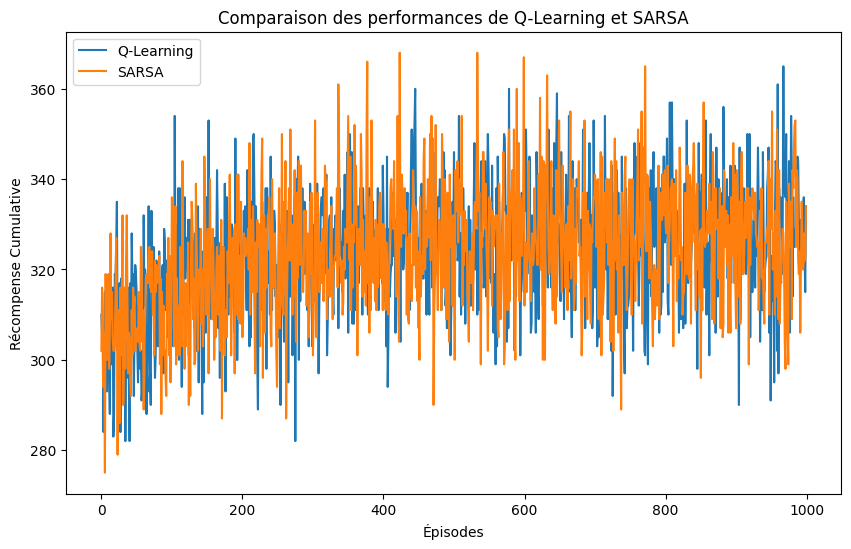

In [8]:
q_table_qlearning, q_learning_rewards = train_q_learning(env)
q_table_sarsa, sarsa_rewards = train_sarsa(env)
    
    # Création du graphique de comparaison
plt.figure(figsize=(10, 6))
plt.plot(q_learning_rewards, label="Q-Learning")
plt.plot(sarsa_rewards, label="SARSA")
plt.xlabel("Épisodes")
plt.ylabel("Récompense Cumulative")
plt.legend()
plt.title("Comparaison des performances de Q-Learning et SARSA")
plt.show()
    

In [9]:
# Analyse des meilleures politiques
print("Analyse des politiques apprises:")
    
    # Exemple: Quel algorithme converge le plus rapidement?
q_learning_convergence = np.mean(q_learning_rewards[-100:])
sarsa_convergence = np.mean(sarsa_rewards[-100:])
    
print(f"Récompense moyenne des 100 derniers épisodes - Q-Learning: {q_learning_convergence:.2f}")
print(f"Récompense moyenne des 100 derniers épisodes - SARSA: {sarsa_convergence:.2f}")
    
if q_learning_convergence > sarsa_convergence:
    print("Q-Learning semble avoir une meilleure politique finale.")
elif sarsa_convergence > q_learning_convergence:
    print("SARSA semble avoir une meilleure politique finale.")
else:
    print("Les deux algorithmes semblent avoir des performances finales similaires.")

Analyse des politiques apprises:
Récompense moyenne des 100 derniers épisodes - Q-Learning: 327.77
Récompense moyenne des 100 derniers épisodes - SARSA: 327.06
Q-Learning semble avoir une meilleure politique finale.


In [10]:
 # Analyse de la vitesse d'apprentissage
q_learning_learning_rate = np.mean([q_learning_rewards[i+100] - q_learning_rewards[i] for i in range(0, len(q_learning_rewards)-100, 100)])
sarsa_learning_rate = np.mean([sarsa_rewards[i+100] - sarsa_rewards[i] for i in range(0, len(sarsa_rewards)-100, 100)])
    
print(f"Taux d'amélioration moyen - Q-Learning: {q_learning_learning_rate:.2f}")
print(f"Taux d'amélioration moyen - SARSA: {sarsa_learning_rate:.2f}")
    
if q_learning_learning_rate > sarsa_learning_rate:
    print("Q-Learning semble apprendre plus rapidement.")
elif sarsa_learning_rate > q_learning_learning_rate:
    print("SARSA semble apprendre plus rapidement.")
else:
    print("Les deux algorithmes semblent apprendre à des vitesses similaires.")


Taux d'amélioration moyen - Q-Learning: 1.00
Taux d'amélioration moyen - SARSA: 0.56
Q-Learning semble apprendre plus rapidement.
